<a href="https://colab.research.google.com/github/GGMmattos/Dados-Espaciais/blob/main/ProjetoErupcoesVulcanicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
import geopandas as gpd # Para manipulação de dados espaciais
!pip install -U folium # update folium to the latest version
import folium
import folium.plugins # explicitly import the plugins module

In [47]:
# Leitura do arquivo CSV sobre dados de erupções vulconicas ao redor do mundo desde 2010
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebook/Dados Espaciais/volcano_data_2010.csv')
df.head()

,Year,Month,Day,TSU,EQ,Name,Location,Country,Latitude,Longitude,...,TOTAL_DEATHS,TOTAL_DEATHS_DESCRIPTION,TOTAL_MISSING,TOTAL_MISSING_DESCRIPTION,TOTAL_INJURIES,TOTAL_INJURIES_DESCRIPTION,TOTAL_DAMAGE_MILLIONS_DOLLARS,TOTAL_DAMAGE_DESCRIPTION,TOTAL_HOUSES_DESTROYED,TOTAL_HOUSES_DESTROYED_DESCRIPTION
0,2010,1,NaN,NaN,NaN,Tungurahua,Ecuador,Ecuador,-1.467,-78.442,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1,2010,3,31.0,NaN,NaN,Eyjafjallajokull,Iceland-S,Iceland,63.630,-19.620,...,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010,5,27.0,NaN,NaN,Pacaya,Guatemala,Guatemala,14.381,-90.601,...,1.0,1.0,3.0,1.0,NaN,NaN,NaN,1.0,3.0,1.0
3,2010,5,29.0,TSU,EQ,Sarigan,Mariana Is-C Pacific,United States,16.708,145.780,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010,8,6.0,NaN,NaN,Karangetang [Api Siau],Sangihe Is-Indonesia,Indonesia,2.780,125.480,...,4.0,1.0,NaN,NaN,5.0,1.0,NaN,NaN,NaN,1.0


In [48]:
# Mantendo apenas as colunas necessárias
df = df[['Year', 'Name', 'Country', 'Latitude', 'Longitude', 'Type']]
df

,Year,Name,Country,Latitude,Longitude,Type
0,2010,Tungurahua,Ecuador,-1.467,-78.442,Stratovolcano
1,2010,Eyjafjallajokull,Iceland,63.630,-19.620,Stratovolcano
2,2010,Pacaya,Guatemala,14.381,-90.601,Complex volcano
3,2010,Sarigan,United States,16.708,145.780,Stratovolcano
4,2010,Karangetang [Api Siau],Indonesia,2.780,125.480,Stratovolcano
...,...,...,...,...,...,...
58,2018,Kilauea,United States,19.425,-155.292,Shield volcano
59,2018,Kadovar,Papua New Guinea,-3.620,144.620,Stratovolcano
60,2018,Ijen,Indonesia,-8.058,114.242,Stratovolcano
61,2018,Kilauea,United States,19.425,-155.292,Shield volcano


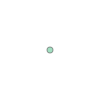

In [49]:
# Criando geometria de pontos (longitude e latitude) para cada vulcão
geometrias = gpd.points_from_xy(df["Longitude"], df["Latitude"])
geometrias[0]
# Por meio da condernadas é plotado um ponto referênte a localização do vulcão.

In [50]:
# Criando um GeoDataFrame a partir de um DataFrame e dos dados de geometrias.
geo_df = gpd.GeoDataFrame(df, geometry=geometrias)
geo_df.head()

# Desta forma é criado a coluna "Geometry" que contém a cordenada do vulcão

,Year,Name,Country,Latitude,Longitude,Type,geometry
0,2010,Tungurahua,Ecuador,-1.467,-78.442,Stratovolcano,POINT (-78.442 -1.467)
1,2010,Eyjafjallajokull,Iceland,63.630,-19.620,Stratovolcano,POINT (-19.62 63.63)
2,2010,Pacaya,Guatemala,14.381,-90.601,Complex volcano,POINT (-90.601 14.381)
3,2010,Sarigan,United States,16.708,145.780,Stratovolcano,POINT (145.78 16.708)
4,2010,Karangetang [Api Siau],Indonesia,2.780,125.480,Stratovolcano,POINT (125.48 2.78)


In [54]:
# Criando Mapa Interativo com Folium
mapa = folium.Map(location=[15, 30], tiles='CartoDB dark_matter', zoom_start=2)

# Criando uma lista comos dados de erupções vulcânicas a partir do Geodataframe
heatmap_dados = [[point.xy[1][0], point.xy[0][0]] for point in geo_df["geometry"]]

# Criando heatmap para visualizar a dencidade de vulcões
folium.plugins.HeatMap(heatmap_dados).add_to(mapa)

# Vizualizar Mapa
mapa.save("mapa.html")
mapa